In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import datetime
import numpy as np
import calendar

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import numpy as np
import string
from num2words import num2words
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
import os
import pickle 
import pathlib


df = pd.read_csv('data/all_merged_data.csv', sep=';')

num_ticks = 6

prefix = 'hour'
df = df.filter(regex=f'^(?!{prefix}).*')
df['day_datetime'] = pd.to_datetime(df['day_datetime'])
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194832 entries, 0 to 194831
Data columns (total 45 columns):
 #   Column                                Non-Null Count   Dtype         
---  ------                                --------------   -----         
 0   city_resolvedAddress                  194832 non-null  object        
 1   day_datetime                          194832 non-null  datetime64[ns]
 2   day_datetimeEpoch                     194832 non-null  int64         
 3   day_tempmax                           194832 non-null  float64       
 4   day_tempmin                           194832 non-null  float64       
 5   day_temp                              194832 non-null  float64       
 6   day_dew                               194832 non-null  float64       
 7   day_humidity                          194832 non-null  float64       
 8   day_precip                            194832 non-null  float64       
 9   day_precipcover                       194832 non-null  floa

,city_resolvedAddress,day_datetime,day_datetimeEpoch,day_tempmax,day_tempmin,day_temp,day_dew,day_humidity,day_precip,day_precipcover,...,event_day_date,event_start_hour_datetimeEpoch,event_end_hour_datetimeEpoch,event_hour_level_event_time,event_hour_level_event_datetimeEpoch,date,vectors,report_date,is_alarm,temp_region
0,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,...,NaN,NaN,NaN,NaN,NaN,2022-02-25,"{'russian': 0.39078, 'forc': 0.37403, 'pm': 0....",2022-02-24,False,False
1,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,...,NaN,NaN,NaN,NaN,NaN,2022-02-25,"{'russian': 0.39078, 'forc': 0.37403, 'pm': 0....",2022-02-24,False,False
2,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,...,NaN,NaN,NaN,NaN,NaN,2022-02-25,"{'russian': 0.39078, 'forc': 0.37403, 'pm': 0....",2022-02-24,False,False
3,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,...,NaN,NaN,NaN,NaN,NaN,2022-02-25,"{'russian': 0.39078, 'forc': 0.37403, 'pm': 0....",2022-02-24,False,False
4,"Луцьк, Луцький район, Україна",2022-02-24,1645653600,4.9,0.7,2.6,0.0,83.7,0.118,4.17,...,NaN,NaN,NaN,NaN,NaN,2022-02-25,"{'russian': 0.39078, 'forc': 0.37403, 'pm': 0....",2022-02-24,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194827,"Вінниця, Україна",2023-01-20,1674165600,11.2,5.7,7.9,6.2,89.3,0.600,12.50,...,NaN,NaN,NaN,NaN,NaN,2023-01-21,"{'russian': 0.51157, 'januari': 0.34153, 'forc...",2023-01-20,False,False
194828,"Вінниця, Україна",2023-01-20,1674165600,11.2,5.7,7.9,6.2,89.3,0.600,12.50,...,NaN,NaN,NaN,NaN,NaN,2023-01-21,"{'russian': 0.51157, 'januari': 0.34153, 'forc...",2023-01-20,False,False
194829,"Вінниця, Україна",2023-01-20,1674165600,11.2,5.7,7.9,6.2,89.3,0.600,12.50,...,NaN,NaN,NaN,NaN,NaN,2023-01-21,"{'russian': 0.51157, 'januari': 0.34153, 'forc...",2023-01-20,False,False
194830,"Вінниця, Україна",2023-01-20,1674165600,11.2,5.7,7.9,6.2,89.3,0.600,12.50,...,NaN,NaN,NaN,NaN,NaN,2023-01-21,"{'russian': 0.51157, 'januari': 0.34153, 'forc...",2023-01-20,False,False


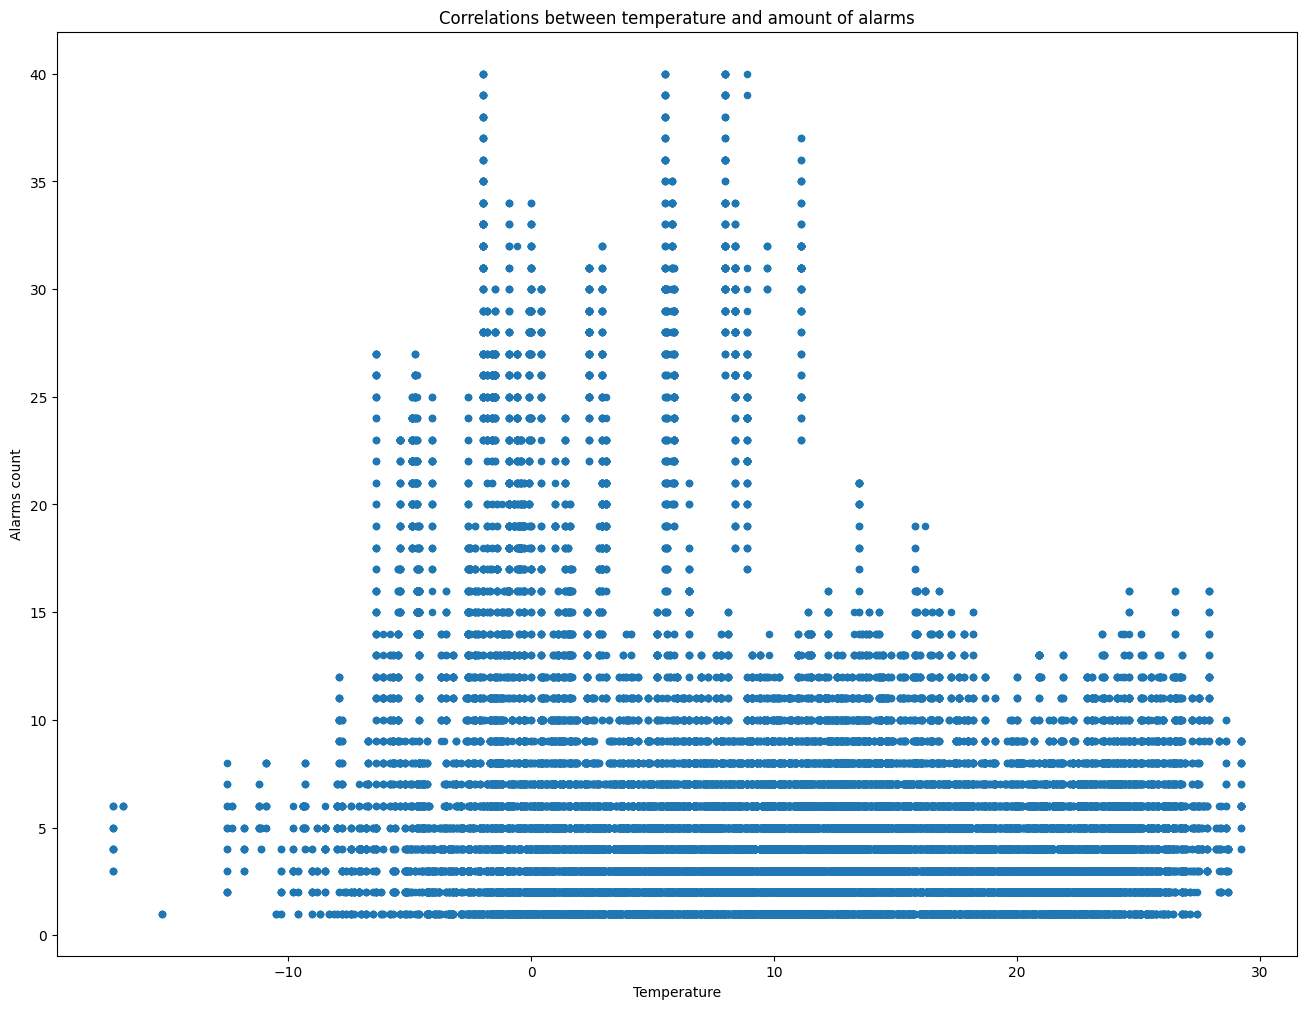

In [10]:

def scatter_temp_alert():
    df.plot(kind='scatter', x='day_temp', y='event_num_alarms_24h', figsize=(16, 12))
    plt.xlabel('Temperature')
    plt.ylabel('Alarms count')
    plt.title('Correlations between temperature and amount of alarms')
    plt.show()


scatter_temp_alert()


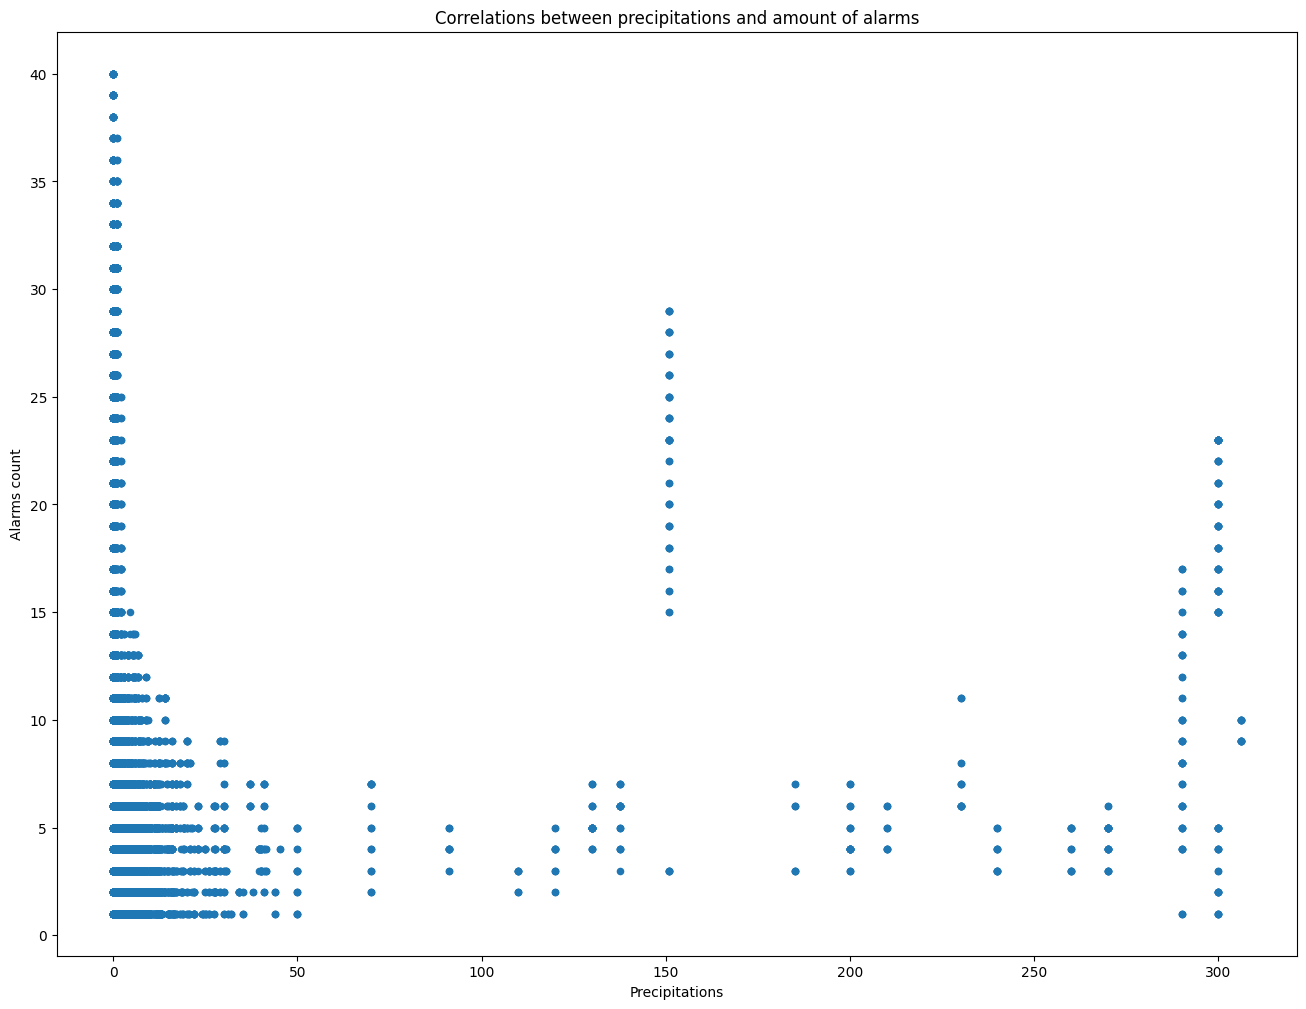

In [11]:

def scatter_alert_precip():
    df.plot(kind='scatter', x='day_precip', y='event_num_alarms_24h', figsize=(16, 12))
    plt.xlabel('Precipitations')
    plt.ylabel('Alarms count')
    plt.title('Correlations between precipitations and amount of alarms')
    plt.show()



scatter_alert_precip()


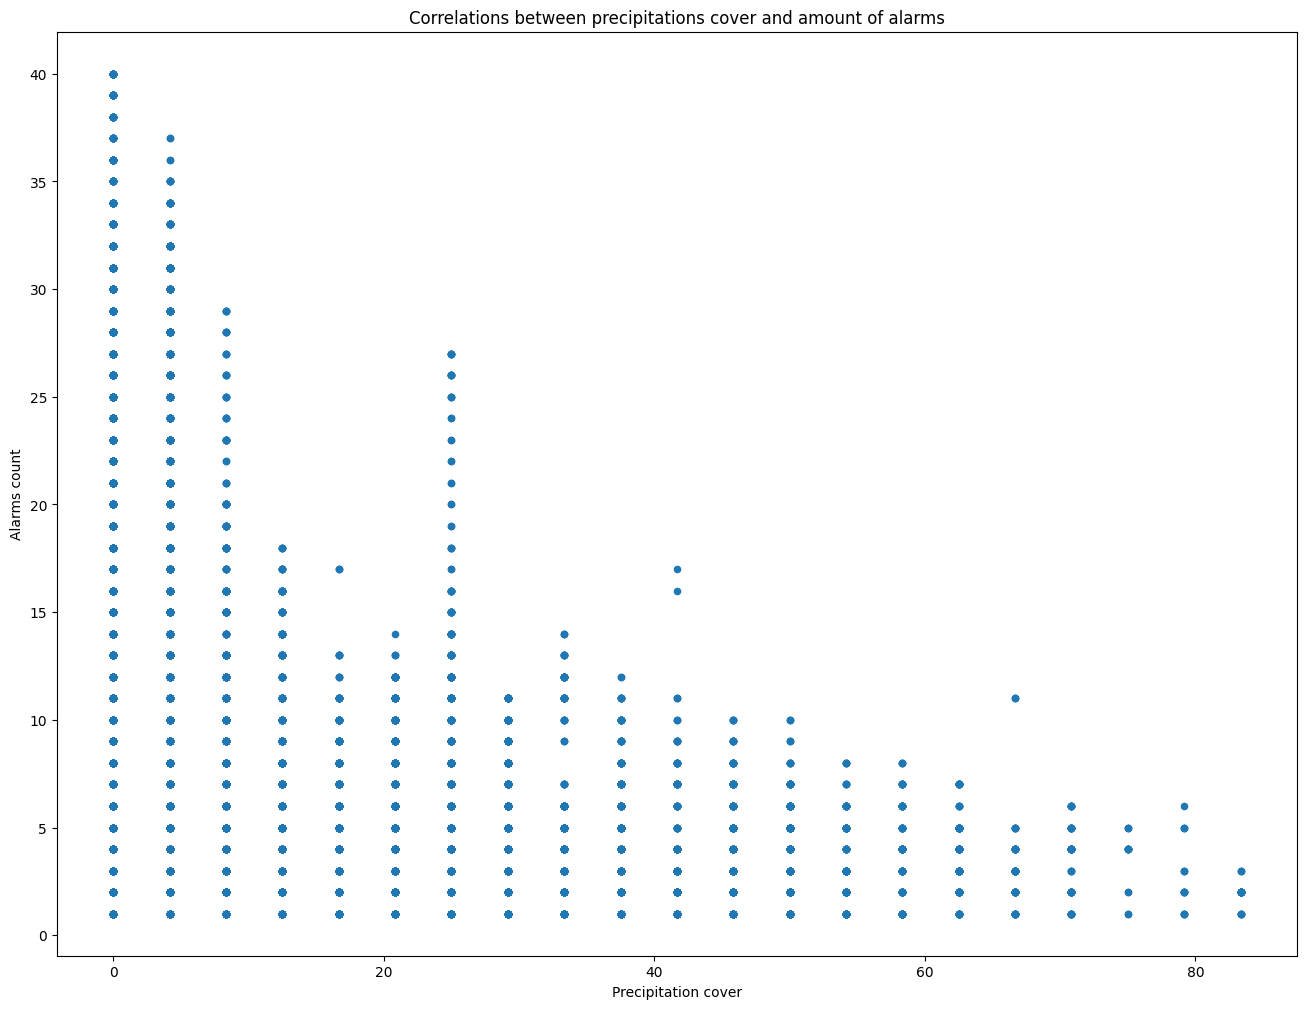

In [12]:

def scatter_alert_precipcover():
    df.plot(kind='scatter', x='day_precipcover', y='event_num_alarms_24h', figsize=(16, 12))
    plt.xlabel('Precipitation cover')
    plt.ylabel('Alarms count')
    plt.title('Correlations between precipitations cover and amount of alarms')
    plt.show()

scatter_alert_precipcover()


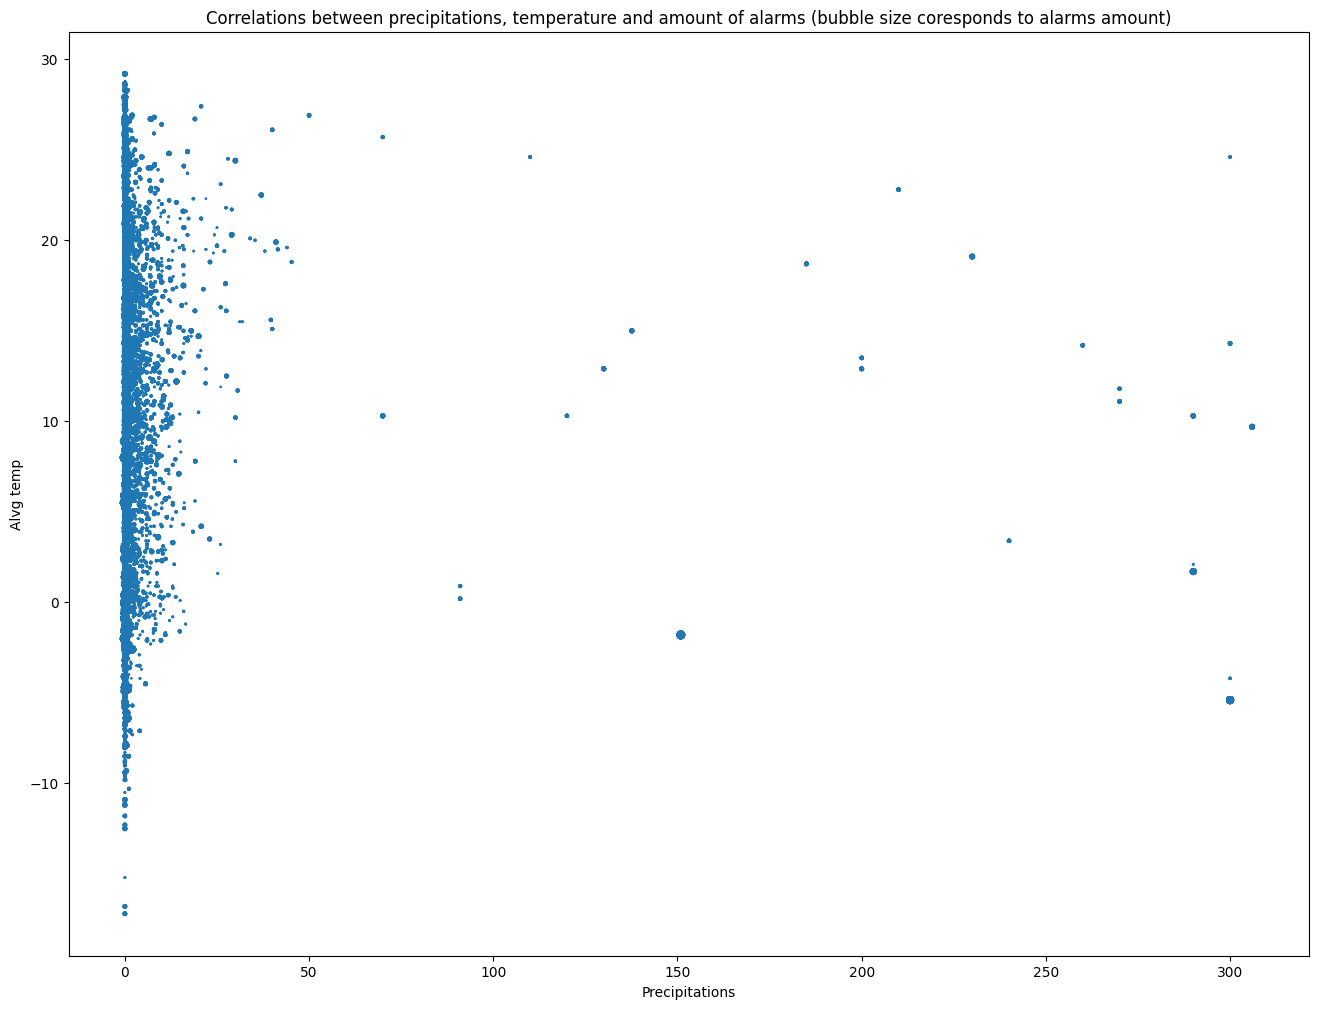

In [13]:

def bubble_3():
    df.plot(kind='scatter', x='day_precip', y='day_temp', s='event_num_alarms_24h', figsize=(16, 12))
    plt.xlabel('Precipitations')
    plt.ylabel('Alvg temp')
    plt.title('Correlations between precipitations, temperature and amount of alarms (bubble size coresponds to alarms amount)')
    plt.show()

bubble_3()


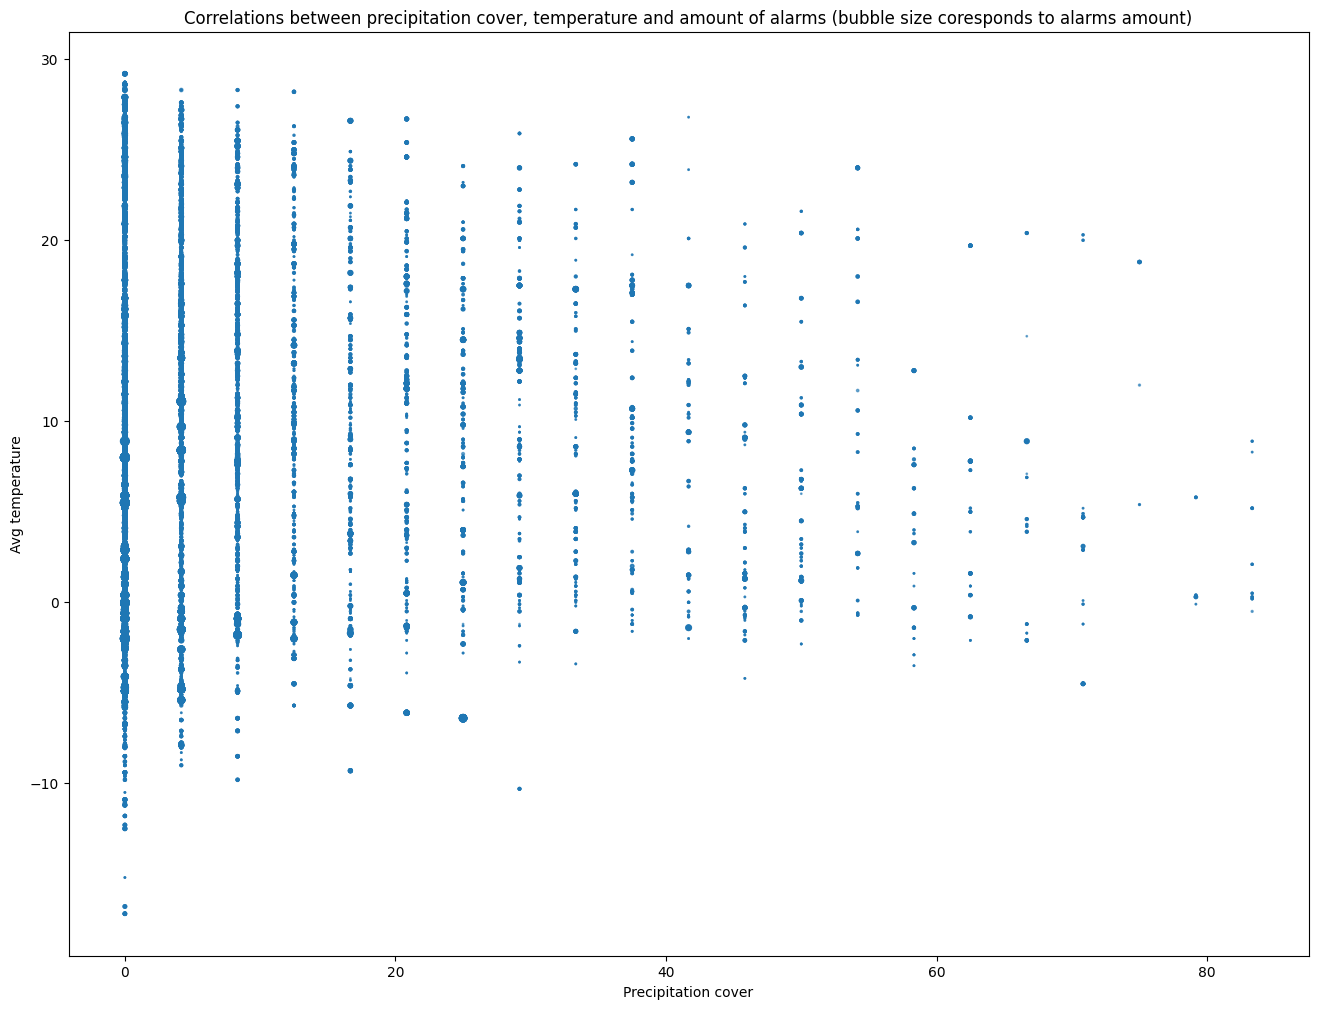

In [14]:

def bubble_32():
    converted = df
    

    df.plot(kind='scatter', x='day_precipcover', y='day_temp', s='event_num_alarms_24h', figsize=(16, 12), alpha=0.6)
    plt.xlabel('Precipitation cover')
    plt.ylabel('Avg temperature')
    plt.title('Correlations between precipitation cover, temperature and amount of alarms (bubble size coresponds to alarms amount)')
    plt.show()

bubble_32()
